#### TODO

- [ ] Generate the random dispersing centers
- [ ] Define the free space Green's function
- [ ] Create the M matrix
- [ ] solve the linear system

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import hankel1
from scipy.constants import pi, hbar

Defining the energy as:

$$E'=\frac{\hbar^2k^2}{2m}$$

We can extract $k$ as:

$$k=\sqrt{\frac{2mE'}{\hbar^2}}$$

But, energy is given in units of $E_0=\frac{\hbar^2}{md^2}$, such that $E=E'/E_0$, so we can write:

$$k=\sqrt{\frac{2mE'}{\hbar^2}}=\sqrt{\frac{2mE_0E}{\hbar^2}}=\sqrt{\frac{2E}{d^2}}$$

/home/pfargas/anaconda3/envs/tfm/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/pfargas/anaconda3/envs/tfm/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


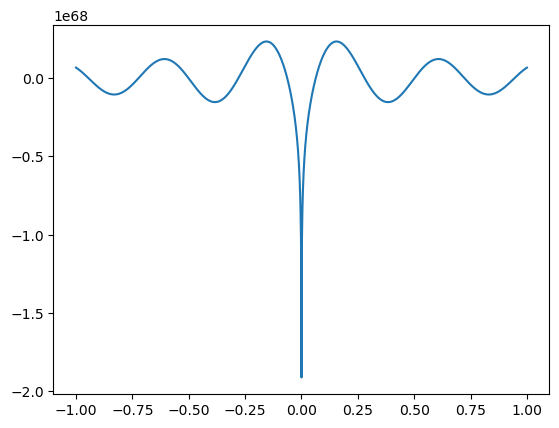

In [27]:
r=np.linspace(-1, 1, 10000)
energy=100
def free_space_green_function(energy, r, m=1, d=1):
    k=np.sqrt(2*energy/d**2) # Careful with the units, if big number, hankel returns nan
    return -(1j*m)/(2*hbar**2) * hankel1(0, k*r)

plt.plot(r, free_space_green_function(energy, r))

In [45]:
def generate_circular_lattice(n):
    x = np.linspace(-1, 1, n)
    y = np.linspace(-1, 1, n)
    X, Y = np.meshgrid(x, y)

    # mask out the points outside the circle
    R = np.sqrt(X**2 + Y**2)
    mask = R <= 1

    # generate a mesh of points in the circle
    X = X[mask]
    Y = Y[mask]
    return X, Y

In [71]:
def generate_circular_lattice(radius=2, spacing=0.01):
    n = int(radius/spacing)
    
    x = np.linspace(-radius, radius, n)
    y = np.linspace(-radius, radius, n)
    X, Y = np.meshgrid(x, y)

    # mask out the points outside the circle
    R = np.sqrt(X**2 + Y**2)
    mask = R <= radius

    # generate a mesh of points in the circle
    X = X[mask]
    Y = Y[mask]
    return X, Y

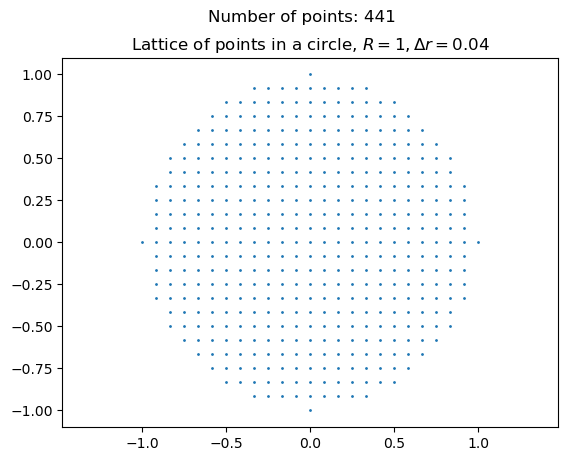

In [84]:
R=1
spacing=0.04

X,Y=generate_circular_lattice(radius=R, spacing=spacing)

plt.scatter(X, Y, s=1)
plt.title(f'Lattice of points in a circle, $R={R}, \Delta r={spacing}$')
plt.suptitle(f'Number of points: {len(X)}')

plt.axis('equal');

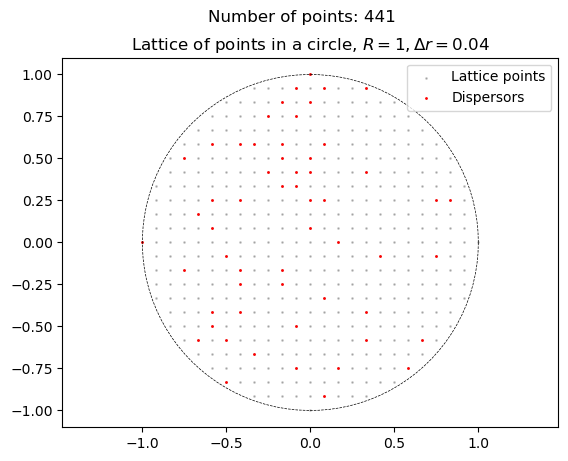

In [230]:
R=1
spacing=0.04

X,Y=generate_circular_lattice(radius=R, spacing=spacing)

# choose each point with probability p
p=.1
np.random.seed(42) # !!!for reproducibility
mask = np.random.rand(len(X)) < p
X_dispersors=X[mask]
Y_dispersors=Y[mask]

plt.scatter(X, Y, s=1, label='Lattice points', color=(0,0,0,0.2))
plt.scatter(X_dispersors, Y_dispersors, s=1, label='Dispersors', c='r')
plt.title(f'Lattice of points in a circle, $R={R}, \Delta r={spacing}$')
plt.suptitle(f'Number of points: {len(X)}')
# plot a circle of radius R
t = np.linspace(0, 2*pi, 100)
plt.plot(R*np.cos(t), R*np.sin(t), 'k--', linewidth=0.5)
plt.legend()
plt.axis('equal');


In [62]:
number_of_points = {}

for i in range(1, 10000, 1000):
    X, Y = generate_circular_lattice(i)
    number_of_points[i]=len(X)

[0.78284192 2.00033409]


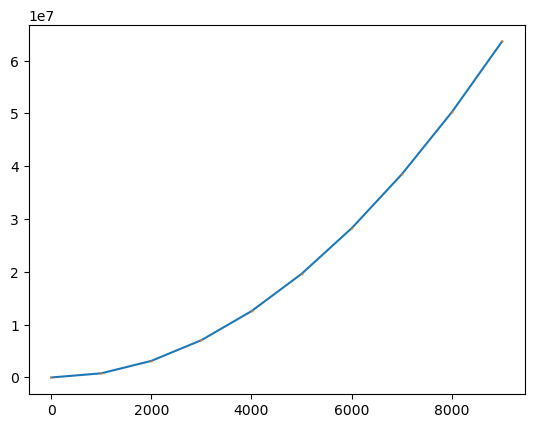

In [63]:
from scipy.optimize import curve_fit
def f(x, a, b):
    return a*x**b

x = np.array(list(number_of_points.keys()))
y = np.array(list(number_of_points.values()))
popt, pcov = curve_fit(f, x, y)
print(popt)
plt.plot(x, f(x, *popt))

plt.plot(x, y, 'o',markersize=0.5)
plt.show()

This verifies the continuum limit which is that the area of a circle is given by $A=\pi (l/2)^2$, and the area of a square is given by $A=l^2$, so:

$$\frac{A_{circle}}{A_{square}}=\frac{\pi (l/2)^2}{l^2}=\frac{\pi}{4}\sim 0.785398...\to A_{circle}=\frac{\pi}{4}A_{square}\approx_{N\to \infty} N_{circle}=\frac{\pi}{4}N_{square}$$